Cell 1 (imports + DB connection)

In [1]:
from pathlib import Path

import sqlite3

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

project_root = Path.cwd().parent

db_path = project_root / "data" / "Synthetic Dataset" / "product_analytics.db"

conn = sqlite3.connect(db_path)

Cell 2 (order level data "trade log")

In [2]:
query = """

SELECT

    order_id,

    net_revenue

FROM orders;

"""

orders = pd.read_sql_query(query, conn)

orders.head()

,order_id,net_revenue
0,1,29.20
1,2,39.26
2,3,127.00
3,4,190.02
4,5,101.55


Cell 3 (define "win" vs "loss")

In [16]:
mean_revenue = orders["net_revenue"].mean()

orders["win"] = orders["net_revenue"] > mean_revenue


In [17]:
win_rate = orders["win"].mean()

win_rate


np.float64(0.43422222222222223)

 Key Insight
    - This is P(win)

Cell 4 (average win & loss)

In [18]:
avg_win = orders.loc[orders["win"], "net_revenue"].mean()

avg_loss = orders.loc[~orders["win"], "net_revenue"].mean()

avg_win,

avg_loss

np.float64(85.841879418696)

Cell 5 (expected value)

In [ ]:
p_win = orders["win"].mean()

p_loss = 1 - p_win

expected_value = (p_win * avg_win) + (p_loss * avg_loss)

expected_value

np.float64(nan)

Cell 6 (high win rate can still fail)

In [12]:
high_win_rate = 0.9

small_win = 10

large_loss = -200

ev_bad = (high_win_rate * small_win) + ((1 - high_win_rate) * large_loss)

ev_bad

-10.999999999999996

In [13]:
low_win_rate = 0.4

big_win = 100

small_loss = -20

ev_good = (low_win_rate * big_win) + ((1 - low_win_rate) * small_loss)

ev_good

28.0

Cell 7 (visual intuition "distribution beats intuition")

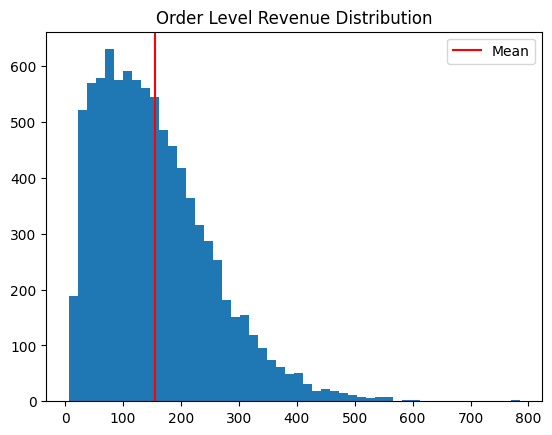

In [14]:
plt.figure()

plt.hist(orders["net_revenue"], bins=50)

plt.axvline(orders["net_revenue"].mean(), color="red", label="Mean")

plt.title("Order Level Revenue Distribution")

plt.legend()

plt.show()

## Day 4 - Probability & Expectation

    - Win rate alone is not sufficient to evaluate performance.
    - Expected value depends on both probability and payoff magnitude.
    - Strategies with low win rates can outperform high win rate strategies if payoff asymmetry is favorable.
    - Distribution shape and tail behavior dominate long term outcomes.

    This framework directly applies to trading strategy evaluation.